In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert labels to one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Normalize pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
def ResNet20(input_shape, num_classes):
    # Input layer
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(filters=16, kernel_size=(3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Residual blocks
    num_blocks = 3
    num_filters = 16
    for i in range(num_blocks):
        # First convolutional layer of the block
        strides = 1 if i == 0 else 2
        y = Conv2D(filters=num_filters, kernel_size=(3, 3), strides=strides, padding='same')(x)
        y = BatchNormalization()(y)
        y = ReLU()(y)

        # Second convolutional layer of the block
        y = Conv2D(filters=num_filters, kernel_size=(3, 3), padding='same')(y)
        y = BatchNormalization()(y)

        # Shortcut connection
        if strides == 1:
            shortcut = x
        else:
            shortcut = Conv2D(filters=num_filters, kernel_size=(1, 1), strides=strides, padding='valid')(x)
            shortcut = BatchNormalization()(shortcut)

        # Residual connection
        x = Add()([y, shortcut])
        x = ReLU()(x)

        # Increase number of filters after each block
        num_filters *= 2

    # Average pooling and output layer
    x = AveragePooling2D(pool_size=(8, 8))(x)
    x = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs, outputs)

    return model


In [ ]:
# Create model
model = ResNet20(input_shape=x_train.shape[1:], num_classes=num_classes)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/10
633/633 [==============================] - 7s 12ms/step - loss: 0.5175 - accuracy: 0.8207 - val_loss: 1.0014 - val_accuracy: 0.6769
Epoch 2/10
633/633 [==============================] - 7s 11ms/step - loss: 0.4926 - accuracy: 0.8284 - val_loss: 0.7544 - val_accuracy: 0.7454
Epoch 3/10
633/633 [==============================] - 7s 10ms/step - loss: 0.4608 - accuracy: 0.8383 - val_loss: 0.9061 - val_accuracy: 0.7029
Epoch 4/10
633/633 [==============================] - 11s 17ms/step - loss: 0.4380 - accuracy: 0.8483 - val_loss: 0.8052 - val_accuracy: 0.7322
Epoch 5/10
633/633 [==============================] - 8s 13ms/step - loss: 0.4165 - accuracy: 0.8540 - val_loss: 0.9085 - val_accuracy: 0.7111
Epoch 6/10
633/633 [==============================] - 7s 11ms/step - loss: 0.3981 - accuracy: 0.8604 - val_loss: 0.8529 - val_accuracy: 0.7253
Epoch 7/10
633/633 [==============================] - 7s 12ms/step - loss: 0.3746 - accuracy: 0.8703 - val_loss: 0.8899 - val_accuracy: 0.720

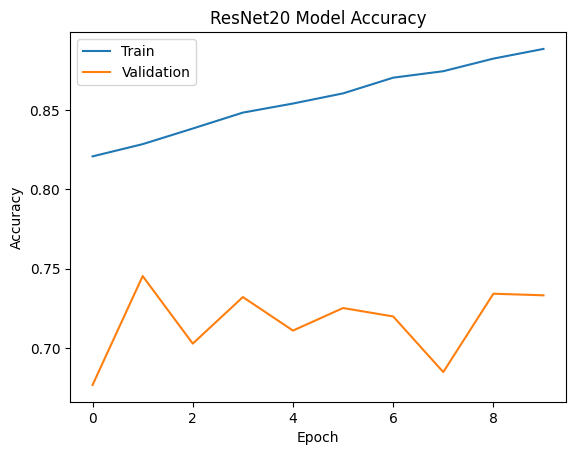

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet20 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
